In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

In [155]:
#Read the data 
df1 = pd.read_csv("ss_jan23.csv")
df2 = pd.read_csv("ss_octtodec22.csv")
df3 = pd.read_csv("ss_julytosep22.csv")

df_8160 = pd.concat([df1, df2, df3])
distinct_count = df_8160["fk_commercial_id"].nunique()

total_rows, total_cols = df_8160.shape

# Print the results
print("Distinct count of commercial ids:", distinct_count)
print("Total number of rows:", total_rows)
display(df_8160.head(10))

Distinct count of commercial ids: 129259
Total number of rows: 954891


,fk_commercial_id,ingestdatetime,mnth,count
0,63718099,2022-07-13 01:53:06.000000,2023-04-01 00:00:00.000000,989
1,63738025,2022-07-13 23:14:12.000000,2023-04-01 00:00:00.000000,679
2,63848100,2022-07-17 22:48:09.000000,2023-04-01 00:00:00.000000,216
3,63856646,2022-07-13 09:28:14.000000,2023-04-01 00:00:00.000000,1432
4,63885220,2022-07-18 09:18:44.000000,2023-04-01 00:00:00.000000,436
5,63890151,2022-07-15 09:18:01.000000,2023-04-01 00:00:00.000000,5918
6,63893007,2022-07-13 12:30:27.000000,2023-04-01 00:00:00.000000,2130
7,63899588,2022-07-14 16:32:24.000000,2023-04-01 00:00:00.000000,470
8,63913377,2022-07-13 05:58:28.000000,2023-04-01 00:00:00.000000,594
9,63924394,2022-07-14 13:54:09.000000,2023-04-01 00:00:00.000000,15


In [156]:
df_8160['ingestdatetime'] = pd.to_datetime(df_8160['ingestdatetime'])
df_8160['mnth'] = pd.to_datetime(df_8160['mnth'])
# create new column with truncated start of month
df_8160['ingest_month'] = df_8160['ingestdatetime'].dt.to_period('M').dt.to_timestamp()
df_8160['ingest_month'] = pd.to_datetime(df_8160['ingest_month'])

# calculate difference in months
df_8160['month_diff'] = df_8160.apply(lambda x: relativedelta(x['mnth'], x['ingest_month']).months, axis=1)
df_8160 = df_8160.sort_values(['fk_commercial_id', 'mnth'])
df_8160.head(10)

,fk_commercial_id,ingestdatetime,mnth,count,ingest_month,month_diff
220940,50439313,2022-07-12 10:47:50,2022-07-01,1,2022-07-01,0
274326,50439313,2022-07-12 10:47:50,2022-08-01,2,2022-07-01,1
291555,59247364,2022-07-16 00:48:08,2022-07-01,67,2022-07-01,0
288902,59247364,2022-07-16 00:48:08,2022-08-01,1,2022-07-01,1
161282,59247364,2022-07-16 00:48:08,2022-09-01,1,2022-07-01,2
30782,59247364,2022-07-16 00:48:08,2022-11-01,1,2022-07-01,4
100624,59247364,2022-07-16 00:48:08,2022-12-01,2,2022-07-01,5
287504,59247364,2022-07-16 00:48:08,2023-02-01,3,2022-07-01,7
240618,59247364,2022-07-16 00:48:08,2023-03-01,5,2022-07-01,8
49139,59247364,2022-07-16 00:48:08,2023-04-01,7,2022-07-01,9


In [157]:
# We see there are ids with month difference as -ve 
#Get count of these ids

c = df_8160.loc[df_8160['month_diff'] < 0, 'fk_commercial_id'].nunique()
df_neg = df_8160[df_8160['month_diff'] > 0]['fk_commercial_id'].unique()

print("Distinct count of commercial ids with ingestion date greater than detection:", c)
print(df_neg)
#Filter out these 8 ids 
df_8160 = df_8160[df_8160['month_diff'] >= 0]

Distinct count of commercial ids with ingestion date greater than detection: 9
[50439313 59247364 59251412 ... 76789249 76873985 76926721]


In [158]:

df_8160["running_count"] = df_8160.groupby("fk_commercial_id")["count"].cumsum()

# Calculate the sum of "count" for each group
grouped2 = df_8160.groupby("fk_commercial_id")["count"].sum()

display(grouped2)

# Calculate the percentage count for each group
df_8160["percentage"] = df_8160.apply(lambda row: row["running_count"] / grouped2[row["fk_commercial_id"]], axis=1)

display(df_8160.head(10))

fk_commercial_id
50439313           3
59247364          87
59251412    12762483
59256324      221278
59257086           2
              ...   
76630017         395
76648449      148995
76789249      992419
76873985         718
76926721          98
Name: count, Length: 129254, dtype: int64

,fk_commercial_id,ingestdatetime,mnth,count,ingest_month,month_diff,running_count,percentage
220940,50439313,2022-07-12 10:47:50,2022-07-01,1,2022-07-01,0,1,0.333333
274326,50439313,2022-07-12 10:47:50,2022-08-01,2,2022-07-01,1,3,1.000000
291555,59247364,2022-07-16 00:48:08,2022-07-01,67,2022-07-01,0,67,0.770115
288902,59247364,2022-07-16 00:48:08,2022-08-01,1,2022-07-01,1,68,0.781609
161282,59247364,2022-07-16 00:48:08,2022-09-01,1,2022-07-01,2,69,0.793103
30782,59247364,2022-07-16 00:48:08,2022-11-01,1,2022-07-01,4,70,0.804598
100624,59247364,2022-07-16 00:48:08,2022-12-01,2,2022-07-01,5,72,0.827586
287504,59247364,2022-07-16 00:48:08,2023-02-01,3,2022-07-01,7,75,0.862069
240618,59247364,2022-07-16 00:48:08,2023-03-01,5,2022-07-01,8,80,0.919540
49139,59247364,2022-07-16 00:48:08,2023-04-01,7,2022-07-01,9,87,1.000000


In [159]:
#Filter for a paritcular id and plot the lifespan of detection for that praticular commercial
filtered_df = df_8160.loc[df_8160['fk_commercial_id'] == 59247364]
filtered_df

,fk_commercial_id,ingestdatetime,mnth,count,ingest_month,month_diff,running_count,percentage
291555,59247364,2022-07-16 00:48:08,2022-07-01,67,2022-07-01,0,67,0.770115
288902,59247364,2022-07-16 00:48:08,2022-08-01,1,2022-07-01,1,68,0.781609
161282,59247364,2022-07-16 00:48:08,2022-09-01,1,2022-07-01,2,69,0.793103
30782,59247364,2022-07-16 00:48:08,2022-11-01,1,2022-07-01,4,70,0.804598
100624,59247364,2022-07-16 00:48:08,2022-12-01,2,2022-07-01,5,72,0.827586
287504,59247364,2022-07-16 00:48:08,2023-02-01,3,2022-07-01,7,75,0.862069
240618,59247364,2022-07-16 00:48:08,2023-03-01,5,2022-07-01,8,80,0.919540
49139,59247364,2022-07-16 00:48:08,2023-04-01,7,2022-07-01,9,87,1.000000


In [160]:
fig = plt.figure(figsize=(10, 7))

filtered_df.plot(x='month_diff', y='percentage', ax= ax)

# set the x-axis limits to range from 1 to 365
#ax.set_xlim(-12, 12)

ax.set_xlabel('Ingest Month Difference')

ax.set_ylabel('%age Detection')

# show the plot
plt.show()

<Figure size 720x504 with 0 Axes>

In [186]:
#Repeat the acitivity with all IDS and get the mean, median, 95th percentile of detection for a day 
#(difference between the ingestion time and detection time )
grouped = df_8160.groupby('month_diff')['percentage']


result = grouped.agg(['median', 'mean',  
                      lambda x: x.quantile(0.05), 
                      lambda x: x.quantile(0.20)])

# reset the index to turn the days difference back into a column
result = result.reset_index()

# rename the columns for clarity
result.columns = ['month_difference', 'median', 'mean', '95th_percentile', '80th_percentile']
result.head(10)

,month_difference,median,mean,95th_percentile,80th_percentile
0,0,0.129220,0.235954,0.005596,0.044199
1,1,0.444241,0.483982,0.056534,0.181818
2,2,0.750000,0.675349,0.149033,0.332404
3,3,0.725868,0.681566,0.211859,0.404703
4,4,0.814739,0.747713,0.305448,0.510913
5,5,0.846452,0.791264,0.400000,0.609510
6,6,0.869883,0.832521,0.525434,0.710692
7,7,0.930202,0.892603,0.677609,0.816512
8,8,0.976551,0.953959,0.859520,0.926080
9,9,1.000000,1.000000,1.000000,1.000000


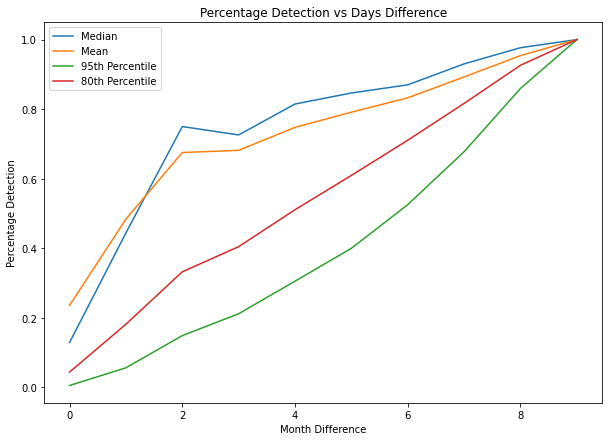

In [188]:
fig = plt.figure(figsize=(10, 7))

# plot the data
plt.plot(result['month_difference'], result['median'], label='Median')
plt.plot(result['month_difference'], result['mean'], label='Mean')
plt.plot(result['month_difference'], result['95th_percentile'], label='95th Percentile')
plt.plot(result['month_difference'], result['80th_percentile'], label='80th Percentile')

# set the x-axis label
plt.xlabel('Month Difference')

# set the y-axis label
plt.ylabel('Percentage Detection')

# set the title
plt.title('Percentage Detection vs Days Difference')

# add legend
plt.legend()

# show the plot
plt.show()

In [163]:
#Get the month by which 95% of detections are done 


In [164]:
grouped2 = grouped2.reset_index().rename(columns={'count': 'total_detections'})
grouped2

,fk_commercial_id,total_detections
0,50439313,3
1,59247364,87
2,59251412,12762483
3,59256324,221278
4,59257086,2
...,...,...
129249,76630017,395
129250,76648449,148995
129251,76789249,992419
129252,76873985,718


In [165]:
result = pd.merge(df_8160, grouped2, on='fk_commercial_id', how='inner')
result

,fk_commercial_id,ingestdatetime,mnth,count,ingest_month,month_diff,running_count,percentage,total_detections
0,50439313,2022-07-12 10:47:50,2022-07-01,1,2022-07-01,0,1,0.333333,3
1,50439313,2022-07-12 10:47:50,2022-08-01,2,2022-07-01,1,3,1.000000,3
2,59247364,2022-07-16 00:48:08,2022-07-01,67,2022-07-01,0,67,0.770115,87
3,59247364,2022-07-16 00:48:08,2022-08-01,1,2022-07-01,1,68,0.781609,87
4,59247364,2022-07-16 00:48:08,2022-09-01,1,2022-07-01,2,69,0.793103,87
...,...,...,...,...,...,...,...,...,...
954842,76873985,2023-01-03 05:54:26,2023-03-01,202,2023-01-01,2,574,0.799443,718
954843,76873985,2023-01-03 05:54:26,2023-04-01,144,2023-01-01,3,718,1.000000,718
954844,76926721,2023-01-05 03:21:11,2023-02-01,48,2023-01-01,1,48,0.489796,98
954845,76926721,2023-01-05 03:21:11,2023-03-01,25,2023-01-01,2,73,0.744898,98


In [166]:
#display(result[result['percentage'] >= 0.95].head(20)
grouped_df = result[result['percentage'] >= 0.95].groupby('fk_commercial_id')['month_diff'].min().reset_index()
final_df = pd.merge(grouped_df, result[['fk_commercial_id', 'month_diff','percentage', 'total_detections']], on=['fk_commercial_id', 'month_diff'], how='inner')
final_df= final_df.sort_values('total_detections', ascending=False)


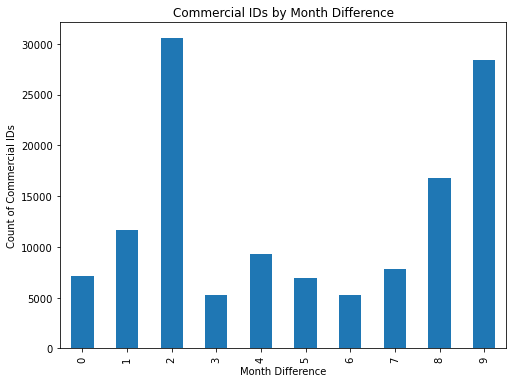

In [167]:
#For all the commercials irrespective of the popularity

counts = final_df.groupby('month_diff')['fk_commercial_id'].nunique()

# create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
counts.plot(kind='bar', ax=ax)

# set labels and title
ax.set_xlabel('Month Difference')
ax.set_ylabel('Count of Commercial IDs')
ax.set_title('Commercial IDs by Month Difference')

plt.show()

131827.40000000002


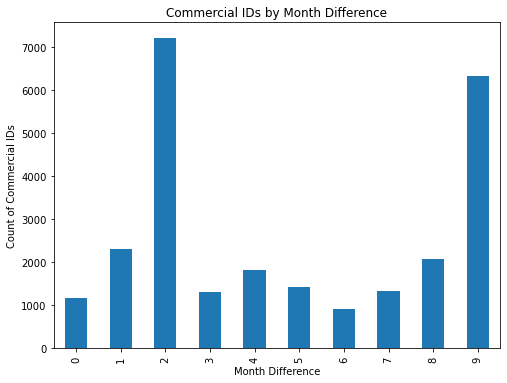

In [168]:
#For top 20% commercials
quantile_value = final_df['total_detections'].quantile(0.8)
print(quantile_value)
top20_df = final_df[final_df['total_detections'] >= quantile_value]
counts = top20_df.groupby('month_diff')['fk_commercial_id'].nunique()

# create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
counts.plot(kind='bar', ax=ax)
# set labels and title
ax.set_xlabel('Month Difference')
ax.set_ylabel('Count of Commercial IDs')
ax.set_title('Commercial IDs by Month Difference')

plt.show()

553.0


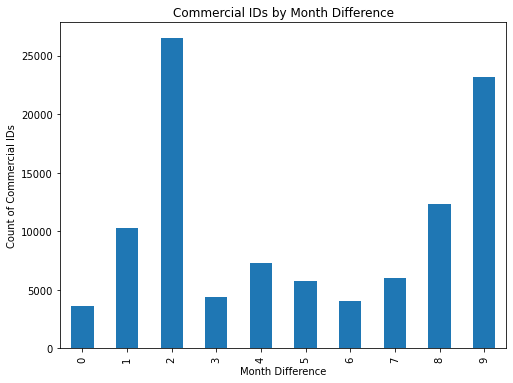

In [169]:
#For top 80% commercials
quantile_value = final_df['total_detections'].quantile(0.2)
print(quantile_value)
top80_df = final_df[final_df['total_detections'] >= quantile_value]
counts = top80_df.groupby('month_diff')['fk_commercial_id'].nunique()

# create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
counts.plot(kind='bar', ax=ax)

# set labels and title
ax.set_xlabel('Month Difference')
ax.set_ylabel('Count of Commercial IDs')
ax.set_title('Commercial IDs by Month Difference')

plt.show()

,month_diff,weights
0,0,0.023263
1,1,0.092024
2,2,0.282169
3,3,0.056525
4,4,0.072680
5,5,0.061338
6,6,0.044817
7,7,0.047495
8,8,0.093072
9,9,0.226620


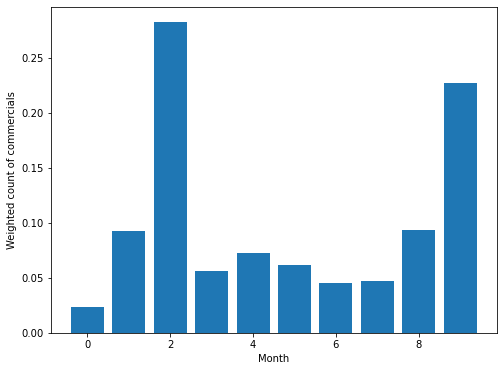

In [170]:
#Add some weight to the data 
total_detections = final_df['total_detections'].sum()

# Calculate percentage weights for each fk_commercial_id
final_df['weights'] = final_df['total_detections']/ total_detections

#display(final_df[final_df['month_diff'] == 1])
# Group by month and sum weights
grouped = final_df.groupby('month_diff')['weights'].sum().reset_index()
display(grouped)
fig, ax = plt.subplots(figsize=(8, 6))
# Plot bar chart of counts weighted by total detections
plt.bar(grouped['month_diff'], grouped['weights'])
plt.xlabel('Month')
plt.ylabel('Weighted count of commercials')
plt.show()

In [171]:
#percentile value for month with 95% detections 
quan70_value = final_df['month_diff'].quantile(0.70)
print(quan70_value)
quan80_value = final_df['month_diff'].quantile(0.80)
print(quan80_value)
quan90_value = final_df['month_diff'].quantile(0.90)
print(quan90_value)
quan95_value = final_df['month_diff'].quantile(0.95)
print(quan95_value)

8.0
9.0
9.0
9.0


In [182]:
result[result['fk_commercial_id'] == 63913224]

,fk_commercial_id,ingestdatetime,mnth,count,ingest_month,month_diff,running_count,percentage,total_detections
93069,63913224,2022-07-13 08:33:03,2022-07-01,6315468,2022-07-01,0,6315468,0.065396,96572280
93070,63913224,2022-07-13 08:33:03,2022-08-01,10246235,2022-07-01,1,16561703,0.171495,96572280
93071,63913224,2022-07-13 08:33:03,2022-09-01,10415846,2022-07-01,2,26977549,0.279351,96572280
93072,63913224,2022-07-13 08:33:03,2022-10-01,10466059,2022-07-01,3,37443608,0.387726,96572280
93073,63913224,2022-07-13 08:33:03,2022-11-01,11059078,2022-07-01,4,48502686,0.502242,96572280
93074,63913224,2022-07-13 08:33:03,2022-12-01,12011590,2022-07-01,5,60514276,0.626622,96572280
93075,63913224,2022-07-13 08:33:03,2023-01-01,11938578,2022-07-01,6,72452854,0.750245,96572280
93076,63913224,2022-07-13 08:33:03,2023-02-01,10382053,2022-07-01,7,82834907,0.857750,96572280
93077,63913224,2022-07-13 08:33:03,2023-03-01,8317734,2022-07-01,8,91152641,0.943880,96572280
93078,63913224,2022-07-13 08:33:03,2023-04-01,5419639,2022-07-01,9,96572280,1.000000,96572280


In [181]:
#MOnth by which 80% of detections are done 

grouped80_df = result[result['percentage'] >= 0.80].groupby('fk_commercial_id')['month_diff'].min().reset_index()
grouped80_df
final80_df = pd.merge(grouped80_df, result[['fk_commercial_id', 'month_diff','percentage', 'total_detections']], on=['fk_commercial_id', 'month_diff'], how='inner')
final80_df= final80_df.sort_values('total_detections', ascending=False)
display(final80_df.head(10))

,fk_commercial_id,month_diff,percentage,total_detections
1961,63704735,7,0.841105,130168466
32573,64146486,8,0.907710,125460617
22364,64053971,7,0.810343,123588117
69357,64397629,7,0.826623,121208417
22045,64050770,7,0.888191,104073780
7345,63858834,7,0.861977,103198955
10621,63913224,7,0.857750,96572280
6225,63837335,8,0.909503,96004460
72815,64418685,7,0.803587,94966806
63474,64363638,4,0.837252,94410533


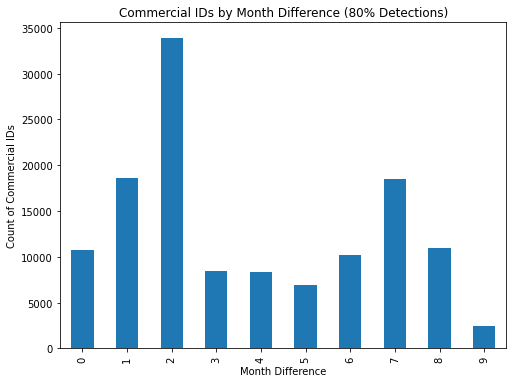

In [183]:
#For all the commercials irrespective of the popularity

counts = final80_df.groupby('month_diff')['fk_commercial_id'].nunique()

# create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
counts.plot(kind='bar', ax=ax)

# set labels and title
ax.set_xlabel('Month Difference')
ax.set_ylabel('Count of Commercial IDs')
ax.set_title('Commercial IDs by Month Difference (80% Detections)')

plt.show()

,month_diff,weights
0,0,0.046747
1,1,0.159615
2,2,0.290127
3,3,0.072303
4,4,0.054758
5,5,0.047972
6,6,0.055027
7,7,0.163222
8,8,0.104079
9,9,0.006149


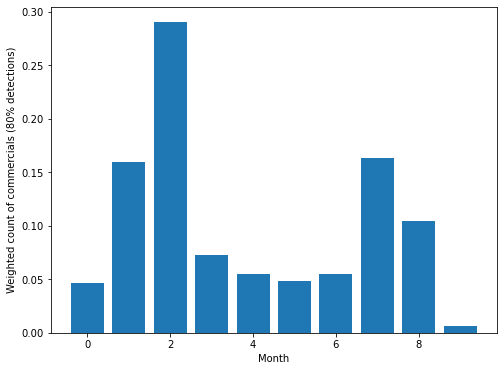

In [185]:
#Add some weight to the data 
total_detections = final80_df['total_detections'].sum()

# Calculate percentage weights for each fk_commercial_id
final80_df['weights'] = final80_df['total_detections']/ total_detections

#display(final_df[final_df['month_diff'] == 1])
# Group by month and sum weights
grouped80 = final80_df.groupby('month_diff')['weights'].sum().reset_index()
display(grouped80)
fig, ax = plt.subplots(figsize=(8, 6))
# Plot bar chart of counts weighted by total detections
plt.bar(grouped80['month_diff'], grouped80['weights'])
plt.xlabel('Month')
plt.ylabel('Weighted count of commercials (80% detections)')
plt.show()

In [80]:
#Analyse how many commercials only have detections in the same month as ingestion because 95th percentile is 99% for 0 month
grouped_df = df_8160.groupby(['fk_commercial_id', 'ingest_month'])

# Filter out the rows where count of unique 'mnth' values is not equal to 1
filtered_df = grouped_df.filter(lambda x: x['mnth'].nunique() == 1 and x['mnth'].iloc[0] == x['ingest_month'].iloc[0])

# Get the unique ids from the filtered dataframe
unique_ids = filtered_df['fk_commercial_id'].unique()